##                                                               Working with UnSupervised Learning

## Introduction of data set

AS we see that the data set contains flower related terms like petal, sepal length, sepal width  by analyzng i came to know that it is an Iris Setosa plants ..  

## Problem Statement
Based on given measurments we have to identify which group  does plant belongs among 
Iris-virginica
Iris-versicolor
Iris-setosa   
so basically we ehave to divide the among their groups/clusters 

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the data set
data=pd.read_csv("Iris.csv")


In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop(['Id'],axis=1,inplace=True)

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# ANALYSIS

In [6]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# k means clustering
# elbow method
# sse-- sum squared distances of data points to their closet cluster centre
# choose apporporiate k where error is min 


In [12]:
# using elbow method
x=data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
ls=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    ls.append(km.inertia_)

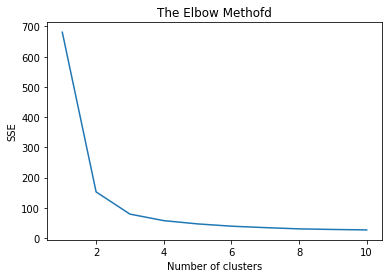

In [13]:
#sum of squared sistance of samples to their
    
plt.plot(range(1,11),ls)
plt.title('The Elbow Methofd')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

## From this we choose no of clusters is 3

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [19]:
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Visualising the clusters centres

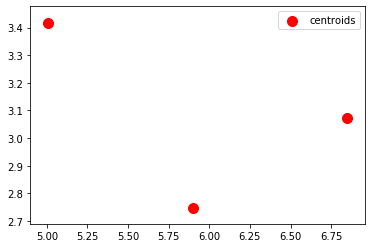

In [17]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=100,c='red',label='centroids')
plt.legend()
plt.show()

# Visualising the clusters 

Text(0.5, 1.0, 'Cluster for Iris setosa')

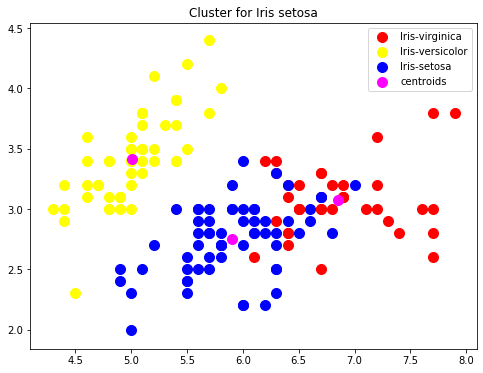

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(x[y_kmeans ==0,0] ,x[y_kmeans==0,1],s=100,c='red',label='Iris-virginica')
plt.scatter(x[y_kmeans ==1,0] ,x[y_kmeans==1,1],s=100,c='yellow',label='Iris-versicolor')
plt.scatter(x[y_kmeans ==2,0] ,x[y_kmeans==2,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='magenta',label='centroids')
plt.legend()
plt.title('Cluster for Iris setosa')

# Finally the optimum number of cluster is 3 

# ANd Repreented them visually with centres